In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

In [15]:
#Function to fill a numpy array with random numbers!
def randomNumpyArr(size,low,high):
    arr = np.zeros(size)
    for ndx in range(size):
        arr[ndx] = round(np.random.uniform(low = low, high = high),3)
    return arr    

In [4]:
testArr = np.zeros(100)
filter1Arr = np.zeros(100)
filter2Arr = np.zeros(100)
for ndx in range(len(testArr)):
    testArr[ndx] = round(np.random.uniform(low=0,high=5),3)


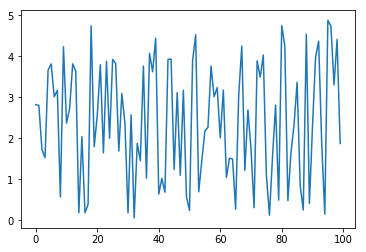

In [5]:
plt.plot(testArr)

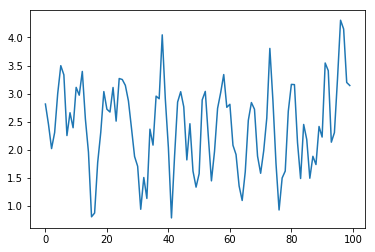

In [6]:
ndx = 0
for ndx in range(len(testArr)):
    if (ndx == 0):
        filter1Arr[ndx] = (testArr[ndx] + testArr[ndx+1])/2
    elif (ndx == len(testArr)-1):
        filter1Arr[ndx] = (testArr[ndx] + testArr[ndx-1])/2
    else:
        filter1Arr[ndx] = (testArr[ndx - 1] + testArr[ndx] + testArr[ndx + 1])/3
plt.plot(filter1Arr)

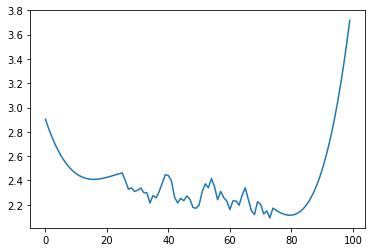

In [7]:
filter2Arr = savgol_filter(testArr, 51, 3)
plt.plot(filter2Arr)

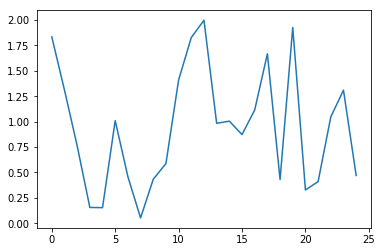

In [8]:
testArr2 = np.zeros(25)
for ndx in range(len(testArr2)):
    testArr2[ndx] = round(np.random.uniform(low=0,high=2),3)
plt.plot(testArr2)

In [31]:
#My crackpot windowing function
def jacobSmoothening(signal):
    smoothSignal = np.zeros(len(signal))
    for ndx in range(2,len(signal)-2):
        smoothSignal[ndx] = (signal[ndx-2]*(.0214) + signal[ndx-1]*(.136)+signal[ndx]*(.687)+signal[ndx+1]*(.136)+signal[ndx+2]*(.0214))
    return smoothSignal

smoothSignal = np.zeros(len(testArr))
for ndx in range(2,len(testArr)-2):
    smoothSignal[ndx] = (testArr[ndx-2]*(.0214) + testArr[ndx-1]*(.136)+testArr[ndx]*(.687)+testArr[ndx+1]*(.136)+testArr[ndx+2]*(.0214))

plt.plot(smoothSignal)

NameError: name 'testArr' is not defined

(-2, 2)

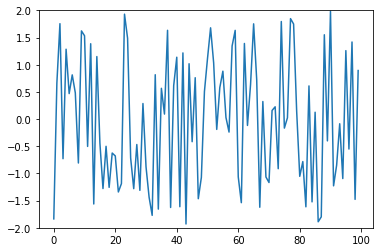

In [10]:
functionTest = randomNumpyArr(100,-2,2)
plt.plot(functionTest)
plt.ylim(-2,2)

(-2, 2)

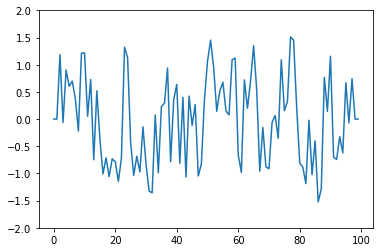

In [11]:
functionTestSmoothened = jacobSmoothening(functionTest)
plt.plot(functionTestSmoothened)
plt.ylim(-2,2)

Text(0.5, 1.0, 'Original Signal')

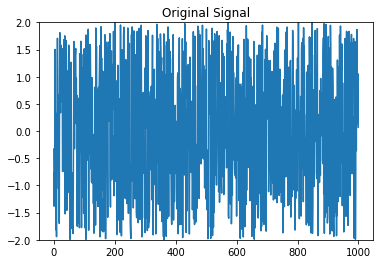

In [12]:
functionTest2 = randomNumpyArr(1000,-2,2)
plt.plot(functionTest2)
plt.ylim(-2,2)
plt.title("Original Signal")

Text(0.5, 1.0, 'Smooth 1x')

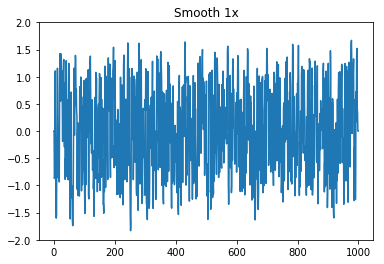

In [13]:
functionTestSmoothened2 = jacobSmoothening(functionTest2)
plt.plot(functionTestSmoothened2)
plt.ylim(-2,2)
plt.title("Smooth 1x")

Text(0.5, 1.0, 'Smoothened 5x')

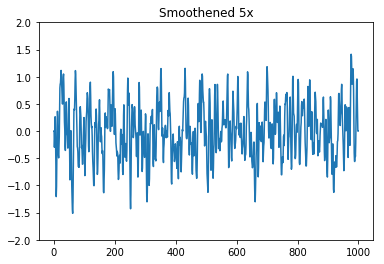

In [14]:
for ndx in range(0,5):
    if ndx == 0:
        functionTestSmoothened3 = jacobSmoothening(functionTest2)
    else:
        functionTestSmoothened3 = jacobSmoothening(functionTestSmoothened3)
plt.plot(functionTestSmoothened3)
plt.ylim(-2,2)
plt.title("Smoothened 5x")

Text(0.5, 1.0, 'Smoothened 10x')

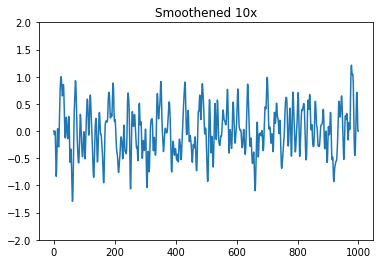

In [15]:
for ndx in range(0,10):
    if ndx == 0:
        functionTestSmoothened4 = jacobSmoothening(functionTest2)
    else:
        functionTestSmoothened4 = jacobSmoothening(functionTestSmoothened4)
plt.plot(functionTestSmoothened4)
plt.ylim(-2,2)
plt.title("Smoothened 10x")

In [16]:
startAverage = np.average(functionTest2)
endAverage = np.average(functionTestSmoothened4)
print(startAverage)
print(endAverage)

0.0028800000000000023
0.0035766984953074913


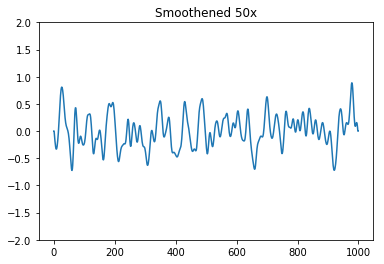

In [19]:
for ndx in range(0,50):
    if ndx == 0:
        functionTestSmoothened5 = jacobSmoothening(functionTest2)
    else:
        functionTestSmoothened5 = jacobSmoothening(functionTestSmoothened5)
plt.plot(functionTestSmoothened5)
plt.ylim(-2,2)
plt.title("Smoothened 50x")
plt.savefig("./CurveSmoothingAnimation/test.png")

In [44]:
endAverage = np.average(functionTestSmoothened5)
print(endAverage)

0.01627466717875169


KeyboardInterrupt: 

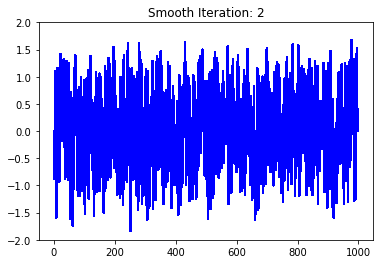

In [22]:
def jacobSmootheningAnimation(signal,iterations):
    smoothSignal = np.zeros(len(signal))
    pngCount = 0
    for i in range(0,iterations):
        if i==0:
            for ndx in range(2,len(signal)-2):
                smoothSignal[ndx] = (signal[ndx-2]*(.0214) + signal[ndx-1]*(.136)+signal[ndx]*(.687)+signal[ndx+1]*(.136)+signal[ndx+2]*(.0214))
                plt.plot(smoothSignal,color="blue")
                plt.ylim(-2,2)
                plt.title("Smooth Iteration: " + str(i))
                plt.savefig("./CurveSmoothingAnimation/"+str(pngCount)+"x")
                pngCount = pngCount + 1
        else:
            for ndx in range(2,len(signal)-2):
                smoothSignal[ndx] = (smoothSignal[ndx-2]*(.0214) + smoothSignal[ndx-1]*(.136)+smoothSignal[ndx]*(.687)+smoothSignal[ndx+1]*(.136)+smoothSignal[ndx+2]*(.0214))
                plt.plot(smoothSignal,color="blue")
                plt.ylim(-2,2)
                plt.title("Smooth Iteration: " + str(i))
                plt.savefig("./CurveSmoothingAnimation/"+str(pngCount)+"x")
                pngCount = pngCount + 1

jacobSmootheningAnimation(functionTest2,50)

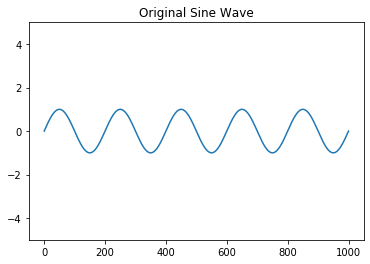

In [38]:
#Creating a test numpy array
#Create a sine wave 5sin(pi/100x)
#add random values to each point on the sine wave.
#Save the sine wave to be tested on different iterations of the algorithm
n = np.linspace(0,1000,1000)
sinWave = np.sin((np.pi/100)*n)
#print(len(sinWave))
#plt.plot(sinWave)
#plt.plot(n,np.sin((np.pi/100)*n))
randomValues = randomNumpyArr(1000,-3,3)
#print(len(randomValues))

plt.plot(sinWave)
plt.ylim(-5,5)
plt.title("Original Sine Wave")
plt.savefig("OriginalSineWave.png")

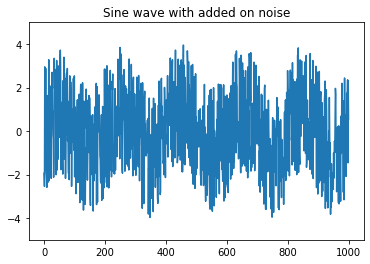

In [39]:
signal = sinWave + randomValues
plt.plot(signal)
plt.ylim(-5,5)
plt.title("Sine wave with added on noise")
plt.savefig("SineWaveWithNoise.png")

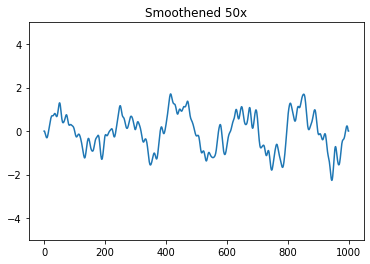

In [40]:
for ndx in range(0,50):
    if ndx == 0:
        functionTestSmoothened6 = jacobSmoothening(signal)
    else:
        functionTestSmoothened6 = jacobSmoothening(functionTestSmoothened6)
plt.plot(functionTestSmoothened6)
plt.ylim(-5,5)
plt.title("Smoothened 50x")
plt.savefig("Smoothened50x.png")

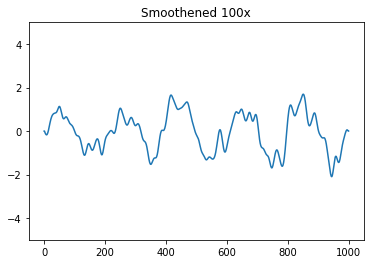

In [41]:
for ndx in range(0,100):
    if ndx == 0:
        functionTestSmoothened7 = jacobSmoothening(signal)
    else:
        functionTestSmoothened7 = jacobSmoothening(functionTestSmoothened7)
plt.plot(functionTestSmoothened7)
plt.ylim(-5,5)
plt.title("Smoothened 100x")
plt.savefig("Smoothened100x.png")

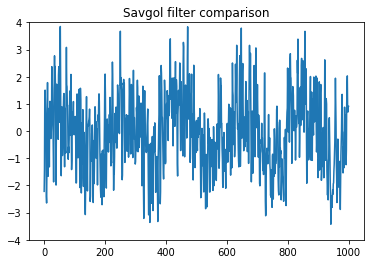

In [47]:
y = np.load("testArray.npy")
otherSmoothing = savgol_filter(y, 5, 3)
plt.plot(otherSmoothing)
plt.ylim(-4,4)
plt.title("Savgol filter comparison")
plt.savefig("savgot_filter_comparison.png")

[-1.93600000e+00 -2.54455781e+00  2.95385329e+00  1.43120224e+00
 -5.02541970e-01  2.88658976e+00 -1.80243335e+00 -2.01564193e+00
 -2.25606645e+00 -2.58573712e+00  1.48331606e+00  1.63306337e+00
  1.74475395e-01 -2.34747695e+00 -4.65822388e-01  3.28141075e+00
 -2.28180547e+00  2.51501500e-01 -5.79695357e-01  2.07657746e+00
  8.17293965e-01 -3.03571266e-01  1.59195691e+00 -2.17114576e+00
  1.51709709e+00  1.69566248e+00  2.69952809e+00  9.77672305e-01
  9.09074213e-01 -1.69286361e-01 -3.51428837e-01 -2.12437186e+00
 -1.29813329e+00  3.34726983e+00  1.96882128e+00  2.03350567e+00
  1.66230850e+00  2.83221611e+00 -8.25784269e-01 -2.00570449e+00
 -6.05555525e-01  3.24665260e+00  9.09107832e-02 -1.79078915e+00
  2.85454559e+00 -1.29809127e+00 -8.97705032e-01  2.99369997e+00
  2.38712037e+00  2.36553775e-01 -2.87001236e-01  3.00945490e+00
  3.33392272e+00  3.72240373e+00  2.92690044e+00 -1.77158371e+00
 -1.53704426e+00  3.52417248e-03  4.61127953e-01  1.33377439e+00
 -9.08528243e-01 -1.97677